<img src="images/cads-logo.png" style="height: 100px;" align=left> 

# DA Capstone

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Queries** Use SQL to query the data

## Submission Guideline
The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.
3. One **Final Dataset** - in csv format

One zip file per group is to be uploaded on GDrive **by 2:30 pm of the last day**, including the jupyter notebook(s) and the powerpoint presentation indicating the names of all group members.


## Presentation Guideline


**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
**Perform Exploratory Data Analysis for the Dataset Provided uisng Python, then load the data into a database using pandas and Solve the queries. The dataset is about customer purchasing history, and focused on determining potential customers.**

You have been provided with information such as customers spending for last sevral years, the amount of money spent,Number of inactive months and so on

## Data description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

##  Import necessary Packages

In [1]:
!pip install ipython-sql

In [139]:
%load_ext sql

In [144]:
%sql sqlite:///Customers.db

In [145]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the Data into Pandas Dataframe

In [93]:
# Load the data into data dataframe
#Your Code Here
data = pd.read_csv('data.csv')

In [94]:
# View first 5 rows of the dataframe
#Your Code Here
data.head() 

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,189943,$200.00,4,25,3,17,$250.00,$64.25,$12.76,...,69,3,11,29,F,1,81.0,M,U,"$71,429.00"
1,1,14064,$100.00,1,1,0,0,$200.00,$200.00,$200.00,...,35,5,5,6,F,0,42.0,M,H,"$65,592.00"
2,0,4194,NaN,2,9,1,7,$150.00,$150.00,$111.11,...,93,7,18,37,A,0,73.0,F,H,"$58,514.00"
3,0,4194,NaN,2,9,1,7,$150.00,$150.00,$111.11,...,93,7,18,37,A,0,73.0,F,H,"$58,514.00"
4,1,12330,$100.00,2,12,0,5,$100.00,$100.00,$41.83,...,87,6,6,31,A,1,NaN,M,U,$0.00


In [95]:
data.shape

(4469, 25)

In [96]:
data.nunique()

Potential_Customer             2
C_ID                        3618
Cust_Last_Purchase            50
Pur_3_years                   15
Pur_5_years                   63
Pur_3_years_Indirect          10
Pur_5_years_Indirect          31
Pur_latest                    59
Pur_3_years_Avg              413
Pur_5_years_Avg             1057
Pur_3_years_Avg_Indirect     263
InAct_Last                    24
InAct_First                  121
Ad_Res_1_year                 42
Ad_Res_3_Year                 60
Ad_Res_5_Year                131
Ad_Res_Ind_1_Year             15
Ad_Res_Ind_3_Year             25
Ad_Res_Ind_5_Year             47
Status_Cust                    6
Status_Latest_Ad               2
Age                           74
Gender                         3
Cust_Prop                      2
Cust_Ann_Income             1897
dtype: int64

In [9]:
# View your data
#Your Code Here
Cust=pd.read_csv('data.csv')
Cust.to_sql('Customers_new',conn)

NameError: name 'conn' is not defined

In [10]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

NameError: name 'conn' is not defined

In [11]:
query2=pd.read_sql_query()

TypeError: read_sql_query() missing 2 required positional arguments: 'sql' and 'con'

# <font color=green>Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data.

### How big is the dataset? (number of rows, features and total datapoints)

In [97]:
#Your Code Her
data.shape

#4469 rows, 25 columns

(4469, 25)

### What columns do we have?

In [98]:
#Your Code Here
list(data.columns)

['Potential_Customer',
 'C_ID',
 'Cust_Last_Purchase',
 'Pur_3_years',
 'Pur_5_years',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_5_Year',
 'Status_Cust',
 'Status_Latest_Ad',
 'Age',
 'Gender',
 'Cust_Prop',
 'Cust_Ann_Income']

In [99]:
for col in data.columns:
    print( col)

Potential_Customer
C_ID
Cust_Last_Purchase
Pur_3_years
Pur_5_years
Pur_3_years_Indirect
Pur_5_years_Indirect
Pur_latest
Pur_3_years_Avg
Pur_5_years_Avg
Pur_3_years_Avg_Indirect
InAct_Last
InAct_First
Ad_Res_1_year
Ad_Res_3_Year
Ad_Res_5_Year
Ad_Res_Ind_1_Year
Ad_Res_Ind_3_Year
Ad_Res_Ind_5_Year
Status_Cust
Status_Latest_Ad
Age
Gender
Cust_Prop
Cust_Ann_Income


### What is the type of each column?



In [100]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?

#### Notice Some features have Dollar AND Comma. Remove the dollar sign and comma from these features

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')`

In [101]:
#Your Code Here
data.head(1)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,189943,$200.00,4,25,3,17,$250.00,$64.25,$12.76,...,69,3,11,29,F,1,81.0,M,U,"$71,429.00"


In [102]:
# Method 1
lis_rep = ['Cust_Last_Purchase', 'Pur_latest', 'Pur_3_years_Avg', \
           'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect','Cust_Ann_Income']

for to_rep in lis_rep:
    data[to_rep] = data[to_rep].str.replace('$','').str.strip() 
    data[to_rep] = data[to_rep].str.replace(',','').str.strip().astype('float')


In [64]:
# Method 2

# data.Cust_Last_Purchase = data.Cust_Last_Purchase.str.replace('$', '')

# data.Pur_latest = data.Pur_latest.str.replace('$', '')

# data.Pur_3_years_Avg = data.Pur_3_years_Avg.str.replace('$', '')

# data.Pur_5_years_Avg = data.Pur_5_years_Avg.str.replace('$', '')

# data.Pur_3_years_Avg_Indirect = data.Pur_3_years_Avg_Indirect.str.replace('$', '')

# data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace('$', '')

# data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace(',', '')

# data.Potential_Customer = data.Potential_Customer.apply(str)

# listobject = ['Cust_Last_Purchase', 'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect', 'Cust_Ann_Income']



# data[listobject] = data[listobject].apply(pd.to_numeric)

data.Status_Latest_Ad = data.Status_Latest_Ad.apply(str)

In [174]:
data.Potential_Customer = data.Potential_Customer.apply(str)

In [175]:
data.head(1)

data.dtypes

Potential_Customer           object
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_Ind_1_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Total_5_yrs_purchase          int64
dtype: object

### Check data for duplicate rows

In [30]:
# Find the number of duplicates
#Your Code Here

#print(f"The total of duplicated rows is {data.duplicated().sum()}.")



In [104]:
# Is there any duplicate in the data
#Your Code Here

data_duplicate = data[data.duplicated()]
print(data_duplicate.count())
print(f"is there any duplicated rows?, {data.duplicated().any()}.")



Potential_Customer          851
C_ID                        851
Cust_Last_Purchase          413
Pur_3_years                 851
Pur_5_years                 851
Pur_3_years_Indirect        851
Pur_5_years_Indirect        851
Pur_latest                  851
Pur_3_years_Avg             851
Pur_5_years_Avg             851
Pur_3_years_Avg_Indirect    686
InAct_Last                  851
InAct_First                 851
Ad_Res_1_year               851
Ad_Res_3_Year               851
Ad_Res_5_Year               851
Ad_Res_Ind_1_Year           851
Ad_Res_Ind_3_Year           851
Ad_Res_Ind_5_Year           851
Status_Cust                 851
Status_Latest_Ad            851
Age                         685
Gender                      851
Cust_Prop                   851
Cust_Ann_Income             851
dtype: int64
is there any duplicated rows?, True.


### Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [105]:
# Remove duplicates
#Your Code Here
data = data.drop_duplicates()
print(data.count())
print(f"The total of duplicated rows is {data.duplicated().sum()}.")

Potential_Customer          3618
C_ID                        3618
Cust_Last_Purchase          1736
Pur_3_years                 3618
Pur_5_years                 3618
Pur_3_years_Indirect        3618
Pur_5_years_Indirect        3618
Pur_latest                  3618
Pur_3_years_Avg             3618
Pur_5_years_Avg             3618
Pur_3_years_Avg_Indirect    2956
InAct_Last                  3618
InAct_First                 3618
Ad_Res_1_year               3618
Ad_Res_3_Year               3618
Ad_Res_5_Year               3618
Ad_Res_Ind_1_Year           3618
Ad_Res_Ind_3_Year           3618
Ad_Res_Ind_5_Year           3618
Status_Cust                 3618
Status_Latest_Ad            3618
Age                         2825
Gender                      3618
Cust_Prop                   3618
Cust_Ann_Income             3618
dtype: int64
The total of duplicated rows is 0.


### Do we need `C_ID` in our analysis?

In [106]:
#Your Code Here
data = data.drop(columns = 'C_ID')
# For future use this column can be used for primary keys to merge data
# But since there no use for the current analysis, we will drop it


### Check whether the columns' types are accurate? if not handle them


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 4464
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        3618 non-null   object 
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

In [107]:
data.head(5).T

,0,1,2,4,5
Potential_Customer,1,1,0,1,0
Cust_Last_Purchase,200.0,100.0,NaN,100.0,NaN
Pur_3_years,4,1,2,2,1
Pur_5_years,25,1,9,12,1
Pur_3_years_Indirect,3,0,1,0,1
Pur_5_years_Indirect,17,0,7,5,1
Pur_latest,250.0,200.0,150.0,100.0,100.0
Pur_3_years_Avg,64.25,200.0,150.0,100.0,100.0
Pur_5_years_Avg,12.76,200.0,111.11,41.83,100.0
Pur_3_years_Avg_Indirect,84.67,NaN,150.0,NaN,100.0


In [108]:
data.describe()
#We found abnormalities in age where the minimum of age is 0.
#We found abnormalities in customer annual income where the minimum of the annual income is 0.

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2956.000000,...,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2825.000000,3618.000000
mean,0.479823,14.557748,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,...,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,0.568546,59.018761,41608.894417
std,0.499662,11.566174,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,9.729153,...,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,0.495348,16.900077,26127.991993
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,...,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,8.000000,...,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,0.000000,47.000000,31385.750000
50%,0.000000,11.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,11.670000,...,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,1.000000,60.000000,44284.500000
75%,1.000000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,16.670000,...,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,1.000000,73.000000,56508.000000
max,1.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,...,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


# <font color=green>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

## Explore Categorical Variables

### Explore Relationship Between Categorical & Target Variable

**Hint**: use `sns.countplot()` plot

In [36]:
color_palette = sns.color_palette()


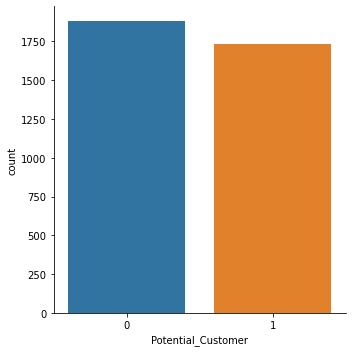

In [176]:
sns.catplot(x="Potential_Customer", kind="count", order=('0', '1'), data=data)
#sns.catplot(x="Status_Latest_Ad", kind="count", data=data)

In [38]:
data = data.assign(total_purchase =  data.Pur_5_years + data.Pur_5_years_Indirect)
data.head()

#We create a new column by merging 2 columns to show the total purchase by customer in last 5 years.

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase
0,1,200.0,4,25,3,17,250.0,64.25,12.76,84.67,...,11,29,F,1,81.0,M,U,71429.0,42.0,42
1,1,100.0,1,1,0,0,200.0,200.00,200.00,NaN,...,5,6,F,0,42.0,M,H,65592.0,1.0,1
2,0,NaN,2,9,1,7,150.0,150.00,111.11,150.00,...,18,37,A,0,73.0,F,H,58514.0,NaN,16
4,1,100.0,2,12,0,5,100.0,100.00,41.83,NaN,...,6,31,A,1,NaN,M,U,0.0,NaN,17
5,0,NaN,1,1,1,1,100.0,100.00,100.00,100.00,...,7,6,F,0,NaN,M,U,0.0,2.0,2


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 4464
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   object 
 1   Cust_Last_Purchase        1736 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

## Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [40]:
data_sorted_total_purchase = data.sort_values(['total_purchase'], ascending=False)
data_sorted_total_purchase.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase
1335,1,32.0,13,89,9,41,19.0,13.38,10.63,13.22,...,22,43,S,1,NaN,F,U,0.0,NaN,130
3319,0,NaN,5,80,3,25,10.0,9.80,4.88,8.67,...,15,33,A,1,NaN,F,H,50760.0,NaN,105
102,1,47.0,4,82,4,23,39.0,46.50,26.83,46.50,...,18,34,A,1,75.0,F,H,40411.0,NaN,105
2954,1,10.0,6,91,4,13,10.0,11.67,6.10,12.50,...,20,37,S,1,79.0,M,H,107323.0,NaN,104
2733,0,NaN,12,76,4,23,11.0,10.83,8.82,11.00,...,21,46,S,1,NaN,F,U,0.0,NaN,99


Text(0.5, 1.0, 'Percentage of Customer Status by Total Purchase')

<Figure size 432x360 with 0 Axes>

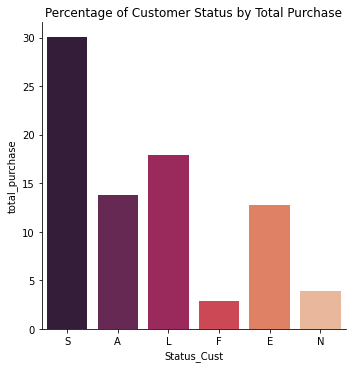

In [41]:
#Your Code Here

#Which Customer Status purchase the most frequent?

plt.figure(figsize=(6,5))
sns.catplot(x='Status_Cust',y='total_purchase', kind='bar', palette='rocket', ci=None, data=data_sorted_total_purchase)
plt.title('Percentage of Customer Status by Total Purchase')

#Star Customers purchase most frequently than others
#First Buyer Customer only purchase once because it's their first purchase.


In [42]:
data_sorted_pur_latest = data.sort_values(['Pur_latest'], ascending=False)
data_sorted_pur_latest.head().T

,0,1,2,9,12
Potential_Customer,1,1,0,1,0
Cust_Last_Purchase,200.0,100.0,NaN,50.0,NaN
Pur_3_years,4,1,2,5,3
Pur_5_years,25,1,9,11,6
Pur_3_years_Indirect,3,0,1,4,2
Pur_5_years_Indirect,17,0,7,6,3
Pur_latest,250.0,200.0,150.0,100.0,100.0
Pur_3_years_Avg,64.25,200.0,150.0,38.0,45.0
Pur_5_years_Avg,12.76,200.0,111.11,31.82,27.0
Pur_3_years_Avg_Indirect,84.67,NaN,150.0,41.25,17.5


Text(0.5, 1.0, 'Customer Latest Purchase ($)')

<Figure size 432x360 with 0 Axes>

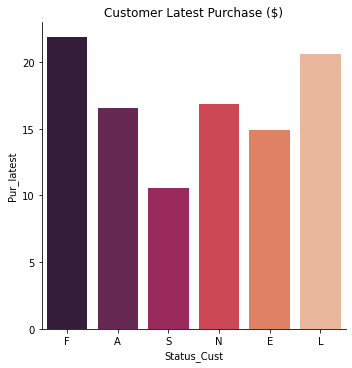

In [43]:
#Which Customer Status purchase the most in the latest purchase?

plt.figure(figsize=(6,5))
sns.catplot(x='Status_Cust',y='Pur_latest', kind='bar', palette='rocket', ci=None,  data=data_sorted_pur_latest)
plt.title('Customer Latest Purchase ($)')

#First Buyer spend the most in the latest purchase.

In [44]:
data = data.assign(total_ads_response =  data.Ad_Res_5_Year + data.Ad_Res_Ind_5_Year)
data.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase,total_ads_response
0,1,200.0,4,25,3,17,250.0,64.25,12.76,84.67,...,29,F,1,81.0,M,U,71429.0,42.0,42,98
1,1,100.0,1,1,0,0,200.0,200.00,200.00,NaN,...,6,F,0,42.0,M,H,65592.0,1.0,1,41
2,0,NaN,2,9,1,7,150.0,150.00,111.11,150.00,...,37,A,0,73.0,F,H,58514.0,NaN,16,130
4,1,100.0,2,12,0,5,100.0,100.00,41.83,NaN,...,31,A,1,NaN,M,U,0.0,NaN,17,118
5,0,NaN,1,1,1,1,100.0,100.00,100.00,100.00,...,6,F,0,NaN,M,U,0.0,2.0,2,22


Text(0.5, 1.0, 'Number of Ads Response by Customer Status')

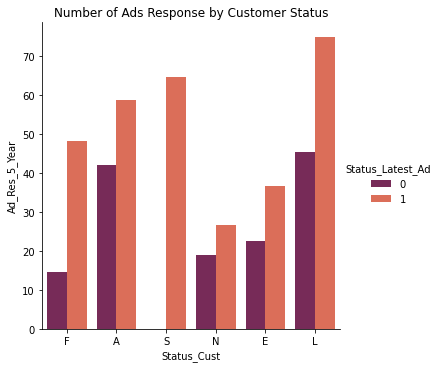

In [47]:
sns.catplot(x="Status_Cust", y="Ad_Res_5_Year", hue='Status_Latest_Ad', kind="bar", palette='rocket', ci=None, data=data)
plt.title('Number of Ads Response by Customer Status')

#Star Customers responds frequently to ads in the last 5 years.
#The least responsive to ads is First Buyer Customers.

In [48]:
data_dropincomezero = data[data['Cust_Ann_Income'] != 0]
data_dropincomezero.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase,total_ads_response
0,1,200.0,4,25,3,17,250.0,64.25,12.76,84.67,...,29,F,1,81.0,M,U,71429.0,42.0,42,98
1,1,100.0,1,1,0,0,200.0,200.00,200.00,NaN,...,6,F,0,42.0,M,H,65592.0,1.0,1,41
2,0,NaN,2,9,1,7,150.0,150.00,111.11,150.00,...,37,A,0,73.0,F,H,58514.0,NaN,16,130
6,1,100.0,1,4,1,1,100.0,100.00,62.50,100.00,...,12,A,0,55.0,F,H,71979.0,NaN,5,68
7,0,NaN,3,16,3,12,100.0,56.67,18.31,56.67,...,25,S,1,86.0,M,H,50021.0,NaN,28,84


In [49]:
data_dropincomezero.shape

(2890, 27)

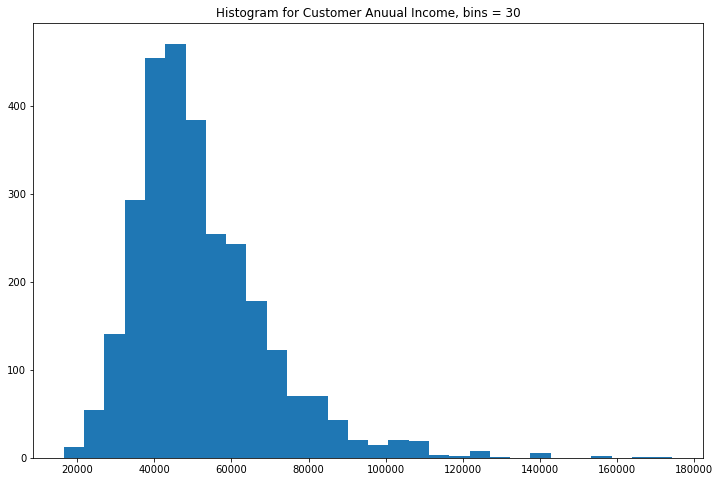

In [50]:
data_dropincomezero.hist(column='Cust_Ann_Income', bins=30, grid=False, figsize=(12,8))
plt.title('Histogram for Customer Anuual Income, bins = 30')
plt.show()

In [51]:
data_star_income = data_dropincomezero[data_dropincomezero['Status_Cust'] == 'S']
data_star_income.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase,total_ads_response
7,0,NaN,3,16,3,12,100.0,56.67,18.31,56.67,...,25,S,1,86.0,M,H,50021.0,NaN,28,84
20,0,NaN,3,10,2,5,60.0,45.00,25.90,55.00,...,25,S,1,57.0,F,H,100406.0,NaN,15,89
25,0,NaN,3,23,2,11,52.0,48.67,38.87,49.50,...,33,S,1,NaN,M,H,87767.0,NaN,34,145
35,0,NaN,4,33,1,8,50.0,50.00,47.00,50.00,...,27,S,1,NaN,M,U,43729.0,NaN,41,147
68,1,50.0,4,9,4,7,50.0,42.50,24.22,42.50,...,20,S,1,68.0,F,U,46202.0,NaN,16,64


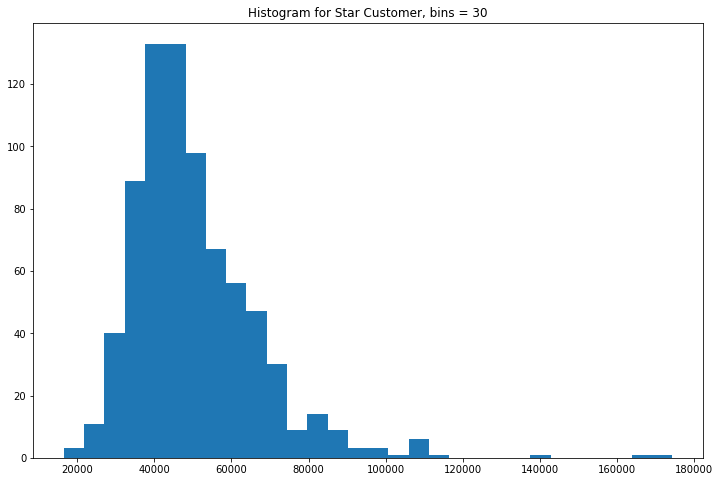

In [52]:
data_star_income.hist(column='Cust_Ann_Income', bins=30, grid=False, figsize=(12,8))
plt.title('Histogram for Star Customer, bins = 30')
plt.show()

In [53]:
data_star_income = data_dropincomezero[data_dropincomezero['Status_Cust'] == 'N']


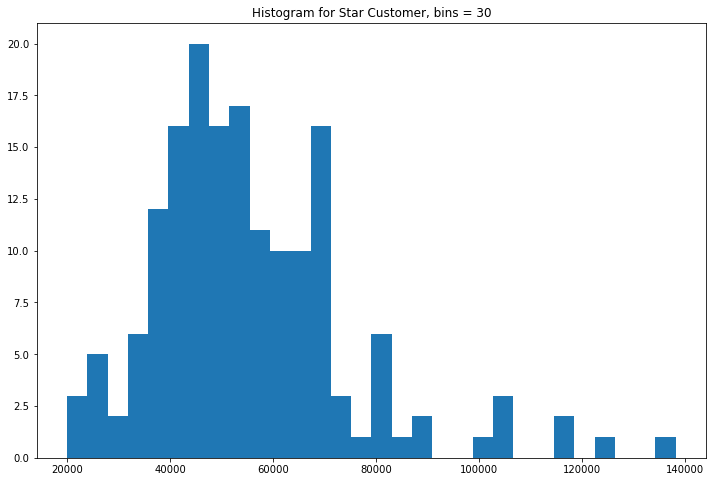

In [54]:
data_star_income.hist(column='Cust_Ann_Income', bins=30, grid=False, figsize=(12,8))
plt.title('Histogram for Star Customer, bins = 30')
plt.show()


### Insight

### Solution

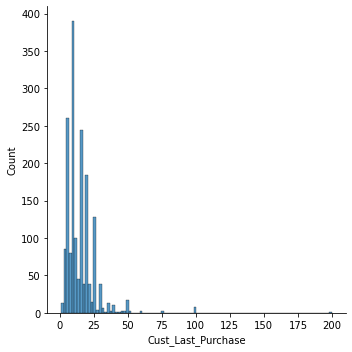

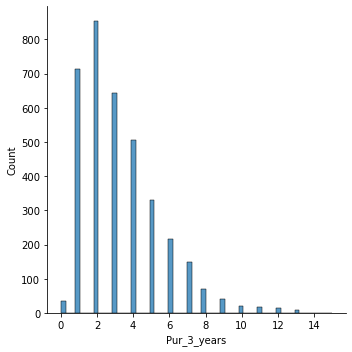

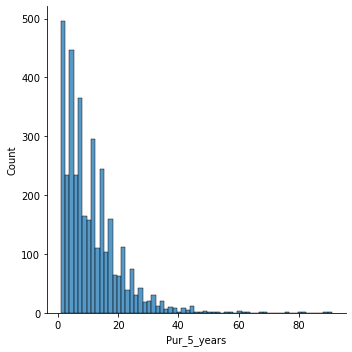

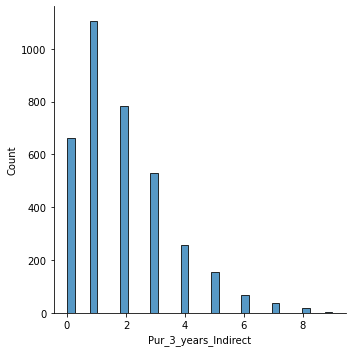

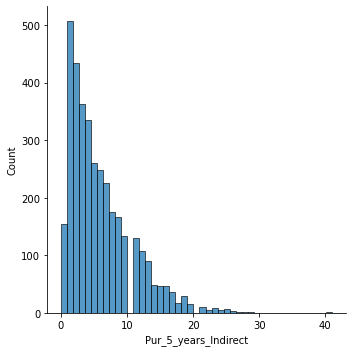

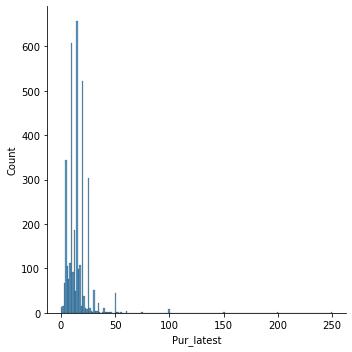

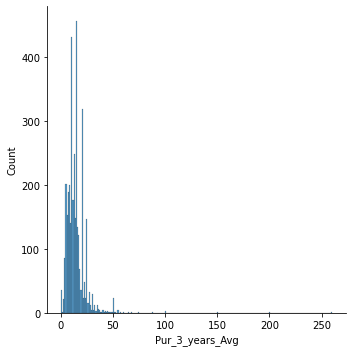

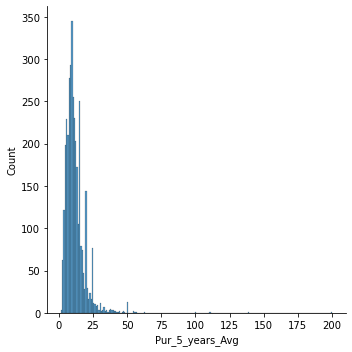

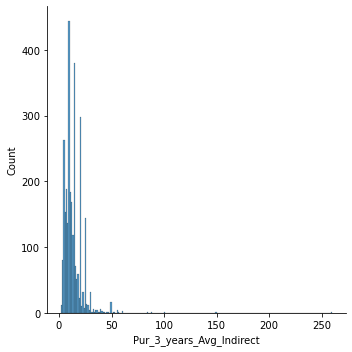

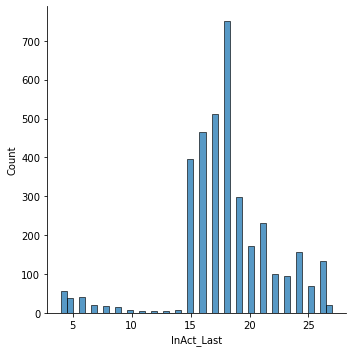

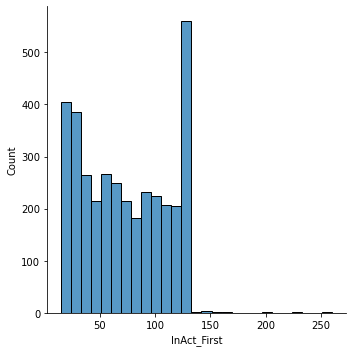

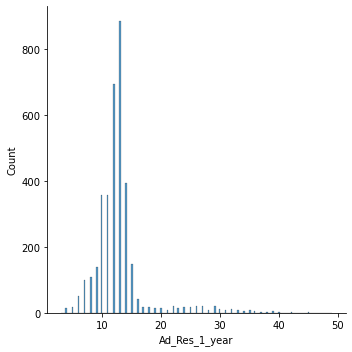

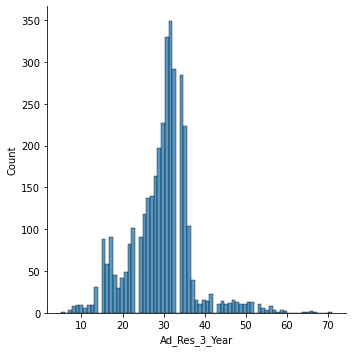

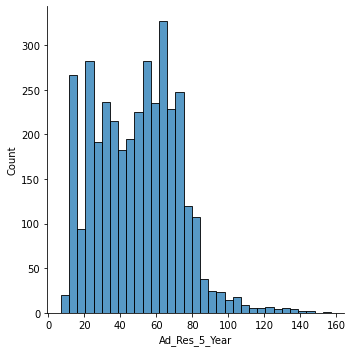

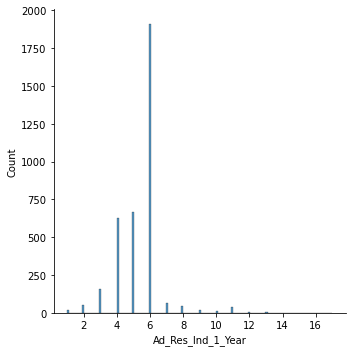

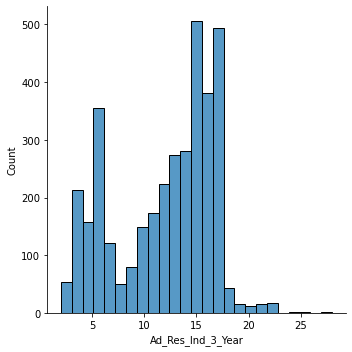

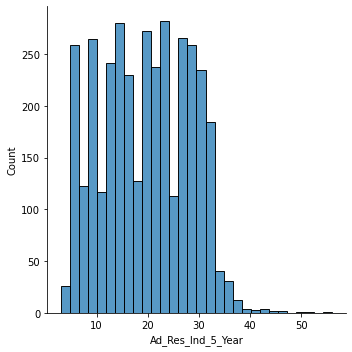

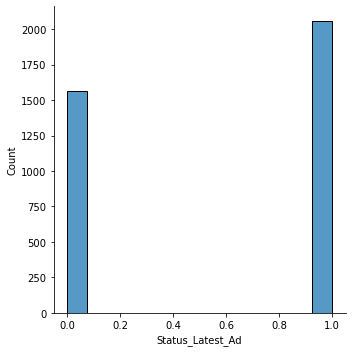

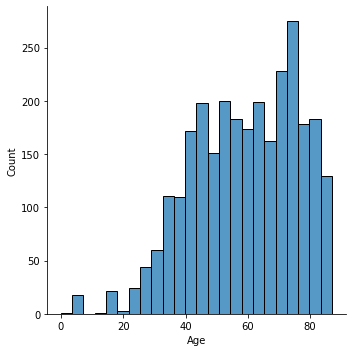

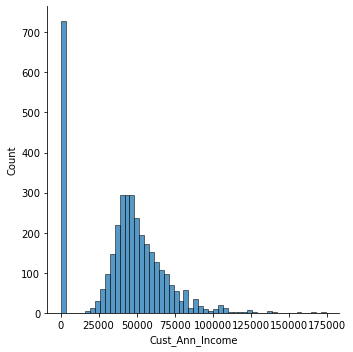

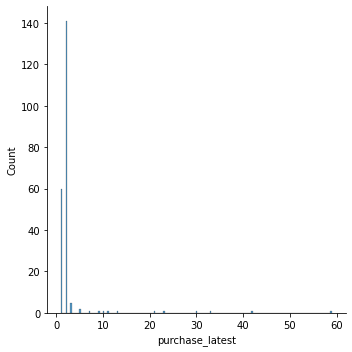

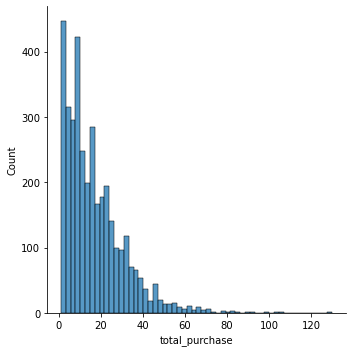

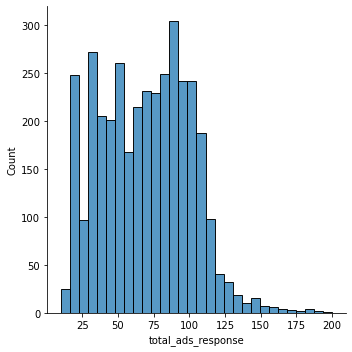

In [56]:
#Your Code Here

mask = data.columns[data.dtypes != 'object']
for num_att in data.dtypes[mask].index:
    sns.displot(data=data, x=num_att)




###  Check the skewness and kurtosis of the variables? Is it normal? Document your process in the notebook of handling skewness and kurtosis


In [74]:
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [58]:
#Your Code Here
skew(data['Cust_Ann_Income'])


0.03980944181228858

In [59]:
skew(data_dropincomezero['Cust_Ann_Income'])

1.511196994218351

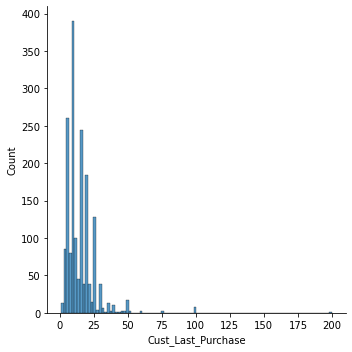

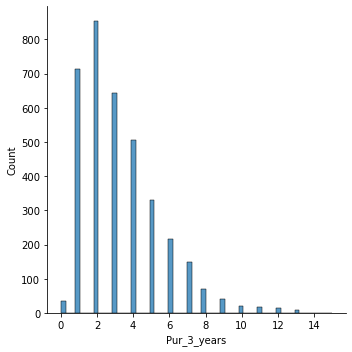

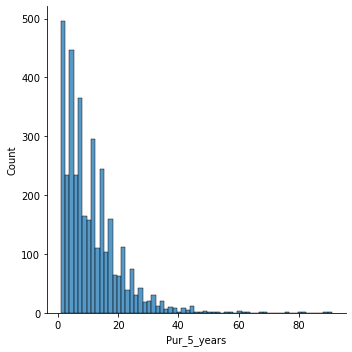

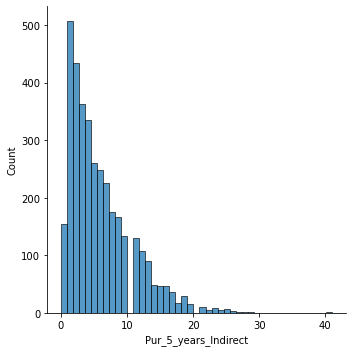

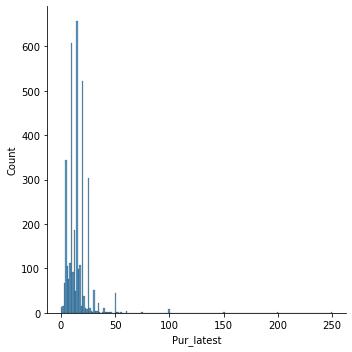

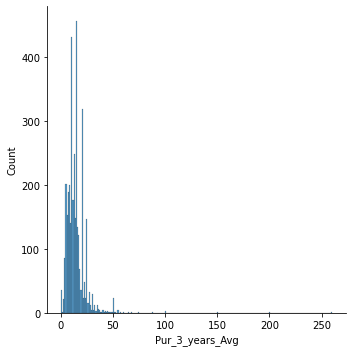

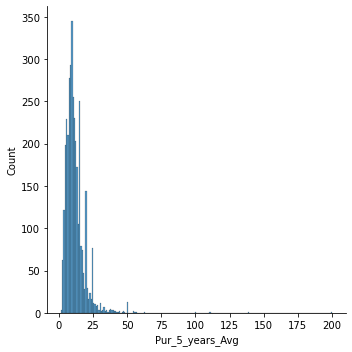

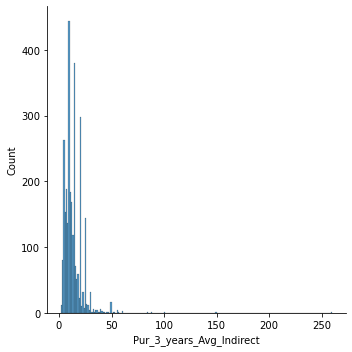

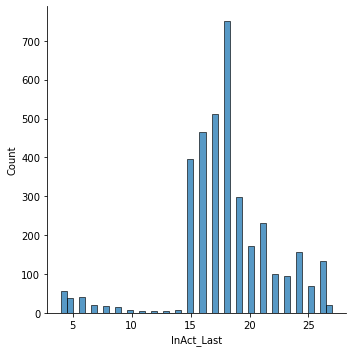

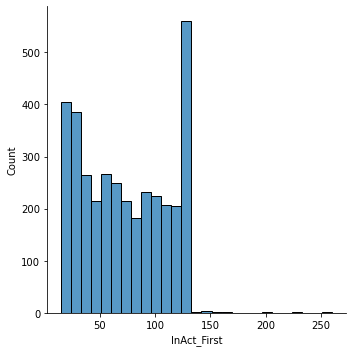

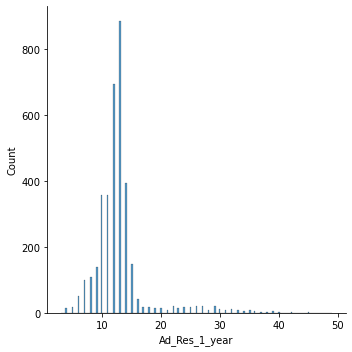

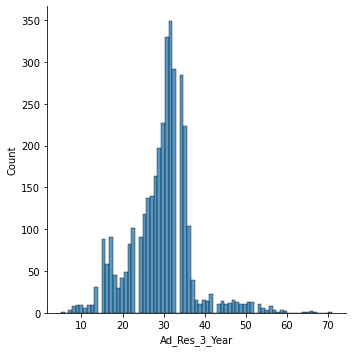

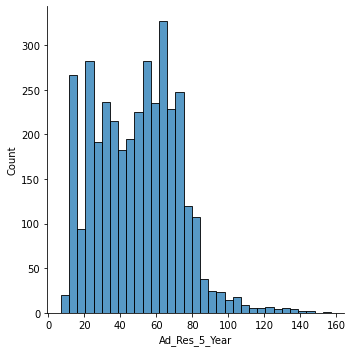

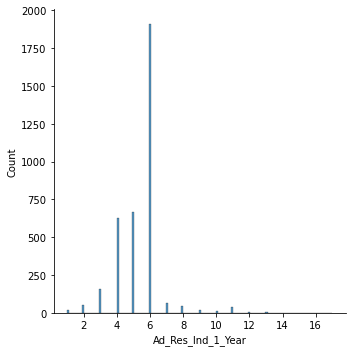

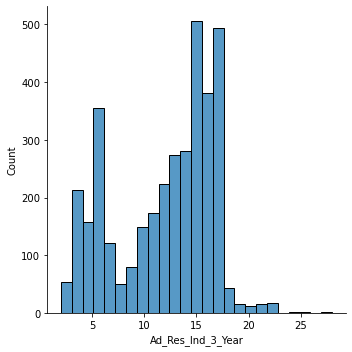

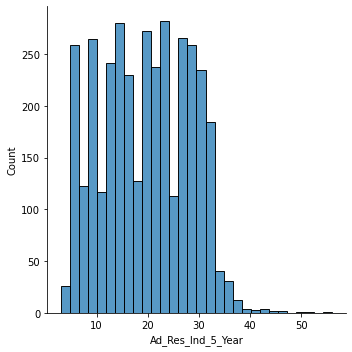

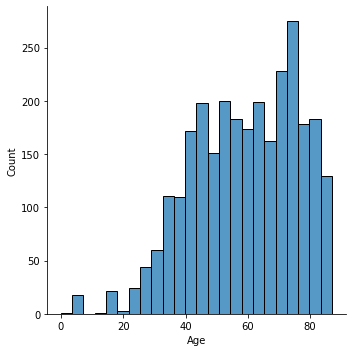

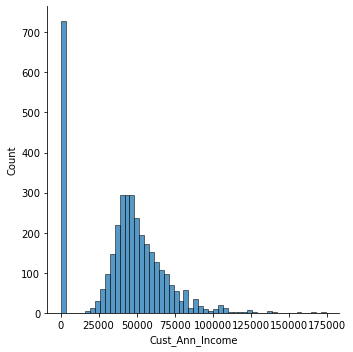

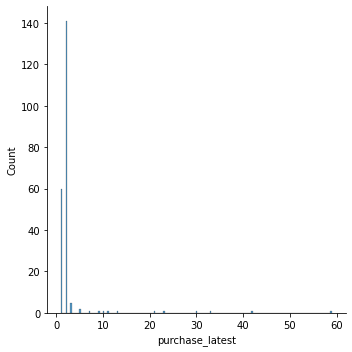

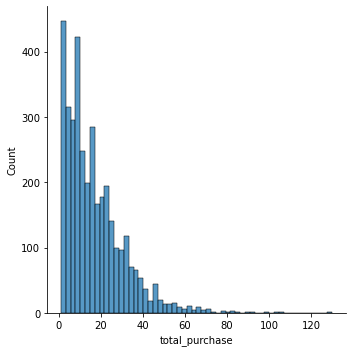

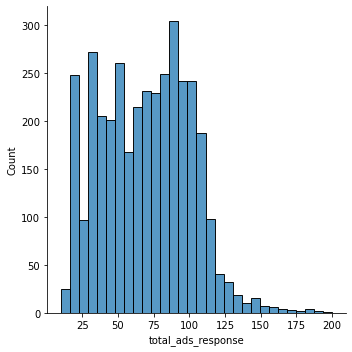

In [60]:
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
        
for num_att in lis:
    sns.displot(data=data, x=num_att)


### Insight

## Check the data for missing values?

In [61]:
data.isnull()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,purchase_latest,total_purchase,total_ads_response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4462,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4463,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [62]:
# Count all NaN in each column
#Your Code Here
data.isnull().sum(axis=0)

Potential_Customer             0
Cust_Last_Purchase          1882
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     662
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          793
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
purchase_latest             3399
total_purchase                 0
total_ads_response             0
dtype: int64

In [68]:
# Count all NaN in the dataframe (both columns & Rows)
#Your Code Here
data.isnull().sum(axis=1)
#data.isnull().sum(axis=0)

0       0
1       1
2       2
4       3
5       2
       ..
4460    2
4461    2
4462    3
4463    3
4464    4
Length: 3618, dtype: int64

### How should we handle missing values? (Should we drop the rows? or impute them with values?)

In [ ]:
#Find which columns have missing value
#Your Code Here
data.isnull().sum(axis=0)

#### Handling Missing Value for `Cust_Last_Purchase` column

In [114]:
#Impute the missing values for Cust_Last_Purchase column
#Your Code Here
data["Cust_Last_Purchase"].fillna("0.0", inplace = True)

In [115]:
data.Cust_Last_Purchase.unique()

array([200.0, 100.0, '0.0', 50.0, 15.0, 20.0, 25.0, 75.0, 60.0, 30.0,
       36.0, 42.0, 47.0, 51.0, 5.0, 40.0, 35.0, 44.0, 10.0, 28.0, 27.0,
       26.0, 32.0, 23.0, 21.0, 48.0, 24.0, 12.0, 22.0, 14.0, 34.0, 7.0,
       37.0, 45.0, 3.0, 29.0, 46.0, 38.0, 17.0, 16.0, 18.0, 11.0, 19.0,
       13.0, 8.0, 18.25, 9.0, 6.0, 4.0, 2.0, 1.0], dtype=object)

#### Handling Missing Value for `Pur_3_years_Avg_Indirect` column 

In [116]:
#Impute the missing values for Pur_3_years_Avg_Indirect column
#Your Code Here

data["Pur_3_years_Avg_Indirect"].fillna("0.0", inplace = True)

#### Handling Missing Value for `Age` column

Changes for Age is omitted since it is not relevant to change missing value of age to 0.

In [117]:
data.Age.median()

60.0

In [118]:
data.loc[data['Age'] <= 14, 'Age'] = data.Age.median()

In [119]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [120]:
(data.Age <= 14).sum()

0

In [114]:
data.Age.unique()

array([81., 42., 73., 60., 55., 86., 62., 74., 47., 66., 17., 57., 76.,
       75., 65., 71., 50., 38., 43., 79., 80., 53., 40., 23., 63., 67.,
       77., 37., 51., 44., 54., 32., 69., 39., 56., 68., 45., 83., 35.,
       52., 87., 33., 58., 61., 41., 26., 25., 72., 59., 64., 78., 48.,
       24., 85., 29., 36., 27., 82., 31., 49., 46., 84., 70., 22., 34.,
       30., 19., 28., 21.])

In [121]:
#Impute the missing values for Age column
#Your Code Here
sorted(data['Age'])[0:10]

[16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]

#### Handling Missing Value for `Cust_Ann_Income` column 

In [122]:
#Your Code Here
data.Cust_Ann_Income.value_counts()
data['Cust_Ann_Income']=data['Cust_Ann_Income'].replace(0,data['Cust_Ann_Income'].median())


In [123]:
data.Cust_Ann_Income.isnull().sum()

0

In [124]:
sorted(data['Cust_Ann_Income'])[0:10]

[16564.0,
 16921.0,
 17589.0,
 18750.0,
 19203.0,
 19618.0,
 20000.0,
 20682.0,
 21517.0,
 21558.0]

#### Handling Missing Value for `Gender` column

In [125]:
#Replace the missing values for Gender column
#Your Code Here

#data['Gender']=data['Gender'].replace('U',data['Gender'].mode())
data['Gender'].replace('U','F', inplace= True)

In [126]:
#Your Code Here

data.Gender.unique()

array(['M', 'F'], dtype=object)

### Explore the Relationship between Numerical Variables & Target Variable

In [ ]:
#Your Code Here

# <font color=green>Insights through data visualization<font>

### Create a chart to visualize potential customer breakdown

<AxesSubplot:xlabel='Potential_Customer', ylabel='count'>

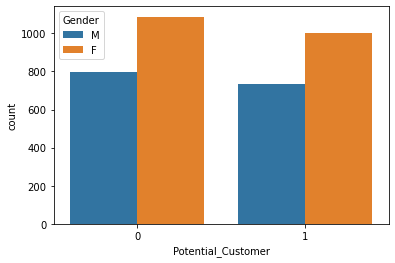

In [36]:
#Your Code Here
sns.countplot(x='Potential_Customer', hue= 'Gender', data=data)

### How is the Age of the customers distributed? Plot your Answer with the appropriate chart

<AxesSubplot:xlabel='Age', ylabel='Density'>

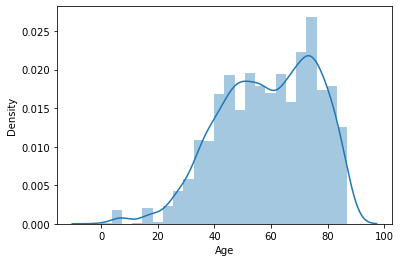

In [37]:
#Your Code Here

sns.distplot(data['Age'], hist = True)

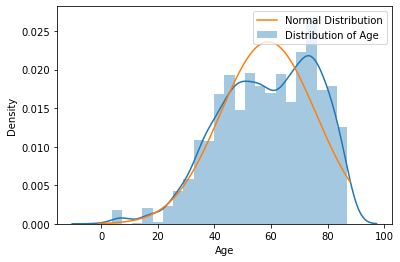

In [75]:
sns.distplot(data['Age'], label='Distribution of Age')

x=np.linspace(min(data['Age'])-1, max(data['Age'])+1, 2000)
y=norm.pdf(x,loc=np.mean(data['Age']), scale=data['Age'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

### Explore the data by visualizing other features (such as customer annual income, distribution of gender)
- Start by asking questions that can add value to the business (example: how did my customers behaving lately?)
- Then continue by identifying which data are needed for the questions to be answered

<AxesSubplot:xlabel='Cust_Ann_Income', ylabel='Density'>

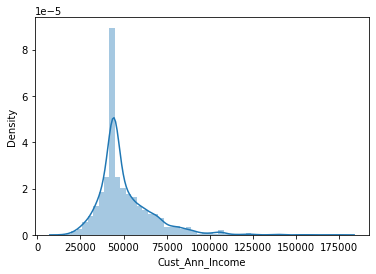

In [43]:
#Your Code Here
sns.distplot(data['Cust_Ann_Income'], hist = True)

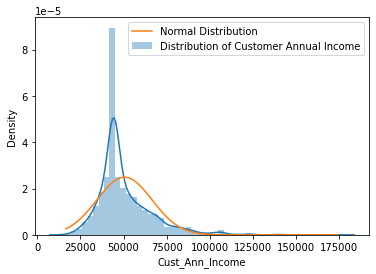

In [76]:
sns.distplot(data['Cust_Ann_Income'], label='Distribution of Customer Annual Income')

x=np.linspace(min(data['Cust_Ann_Income'])-1, max(data['Cust_Ann_Income'])+1, 2000)
y=norm.pdf(x,loc=np.mean(data['Cust_Ann_Income']), scale=data['Cust_Ann_Income'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

<AxesSubplot:xlabel='InAct_First', ylabel='Density'>

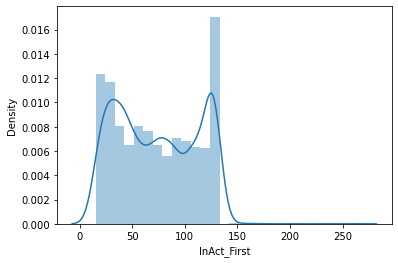

In [44]:
#Your Code Here
sns.distplot(data['InAct_First'], hist = True)

#Inactive number of months since customer made the last purchase

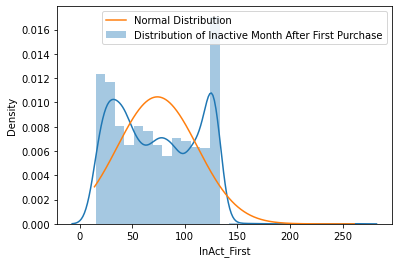

In [78]:
sns.distplot(data['InAct_First'], label='Distribution of Inactive Month After First Purchase')

x=np.linspace(min(data['InAct_First'])-1, max(data['InAct_First'])+1, 2000)
y=norm.pdf(x,loc=np.mean(data['InAct_First']), scale=data['InAct_First'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

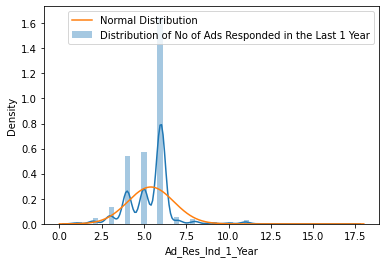

In [79]:
sns.distplot(data['Ad_Res_Ind_1_Year'], label='Distribution of No of Ads Responded in the Last 1 Year')

x=np.linspace(min(data['Ad_Res_Ind_1_Year'])-1, max(data['Ad_Res_Ind_1_Year'])+1, 2000)
y=norm.pdf(x,loc=np.mean(data['Ad_Res_Ind_1_Year']), scale=data['Ad_Res_Ind_1_Year'].std(ddof=1))
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

### What is the distribution of customers' last purchase


<AxesSubplot:xlabel='Cust_Last_Purchase', ylabel='Density'>

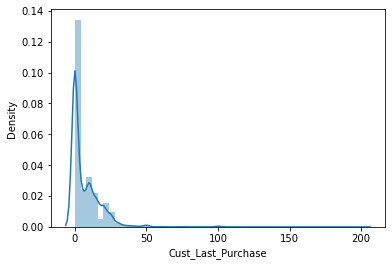

In [60]:
#Your Code Here

sns.distplot(data['Cust_Last_Purchase'], hist = True)

#Amount purchased in the most recent.

### What's the Purchase amount pattern with regards to Gender

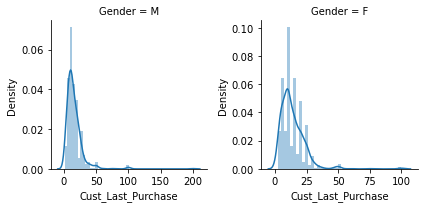

In [46]:
#Your Code Here
g = sns.FacetGrid(data, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase")

### On average, which group of gender has the higher latest purchase amount?


In [ ]:
#Your Code Here

In [ ]:
#Your Code Here

### What is the distribution of the status of our customers


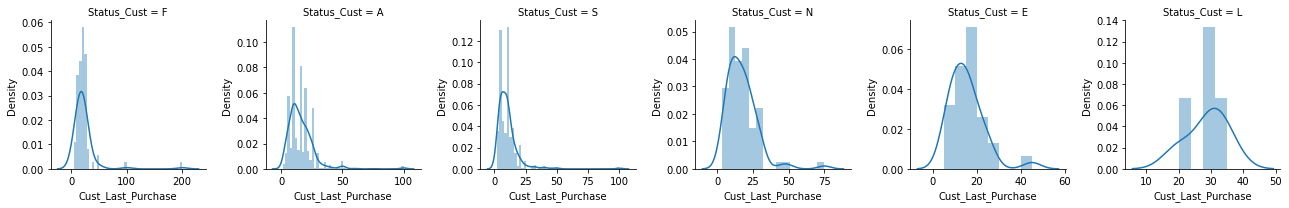

In [47]:
#Your Code Here
g = sns.FacetGrid(data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase")

### What is the average number of purchase made in the last 3 years among different customer status


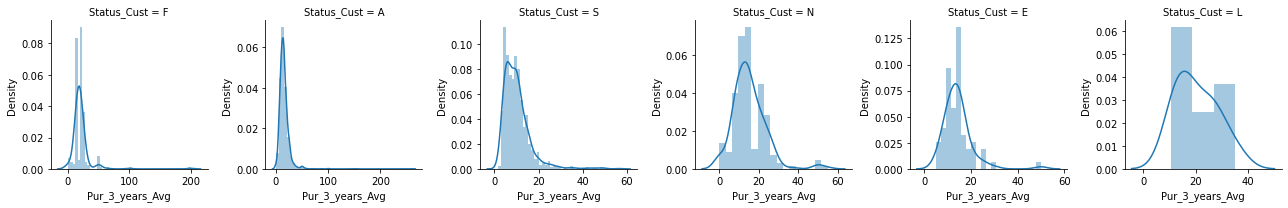

In [48]:
#Your Code Here
g = sns.FacetGrid(data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_3_years_Avg")

### What is the average number of purchase made in the last 5 years among different customer status


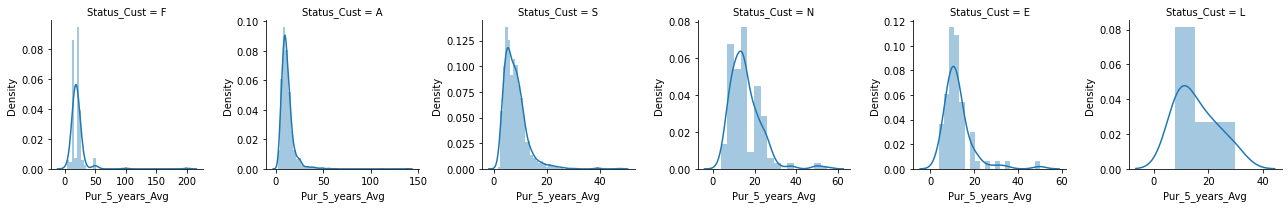

In [49]:
#Your Code Here
g = sns.FacetGrid(data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_5_years_Avg")

### What is the distribution of the inactive number of months since last purchase?


<AxesSubplot:xlabel='InAct_Last', ylabel='Density'>

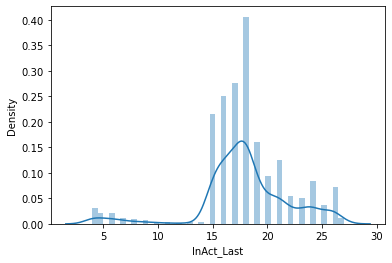

In [50]:
#Your Code Here

sns.distplot(data['InAct_Last'], hist = True)

### What is the average number of purchase made in the last 3 years among different gender


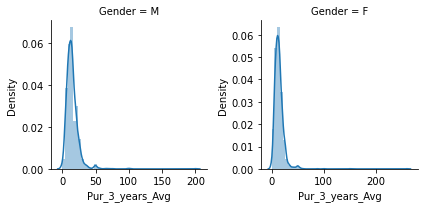

In [51]:
#Your Code Here

g = sns.FacetGrid(data, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Pur_3_years_Avg")

### Check the distribution of customers who responded to ads in past 5 years

#### Plot By gender

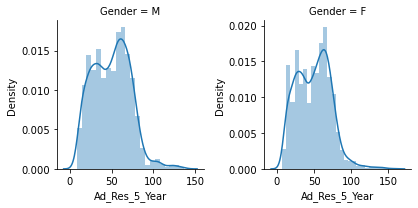

In [52]:
#Your Code Here

g = sns.FacetGrid(data, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

#### Plot By Customer Status

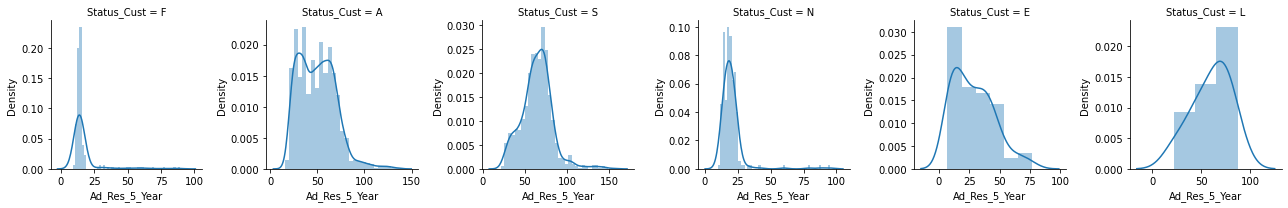

In [53]:
#Your Code Here

g = sns.FacetGrid(data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

#### Plot By House Ownership

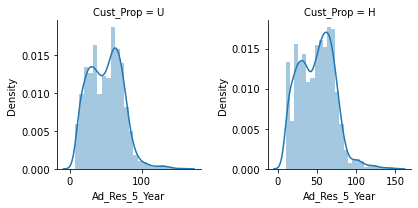

In [54]:
#Your Code Here
g = sns.FacetGrid(data, col = "Cust_Prop", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year")

#### Summarize your findings - what have you learned from your insights?

In [82]:
display(data.groupby("Potential_Customer").agg(['mean']))

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income,purchase_latest,Total_5_yrs_purchase
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Potential_Customer,,,,,,,,,,,,,,,,,,,,,
0,3.000000,10.133900,1.698193,5.424548,16.314426,15.309469,12.775112,14.693416,18.344315,71.214665,...,29.022317,47.854942,5.321467,11.635494,18.908608,inf,58.332880,50621.352816,2.798561,15.558448
1,3.643433,11.978111,2.137673,6.389401,14.132200,13.225507,10.979493,12.457223,17.489631,76.618088,...,30.223502,51.520737,5.493088,12.529378,20.158410,inf,59.761799,50409.395161,2.950000,18.367512


In [83]:
# Potential Customer is not based on Cust_Ann_Income, Pur_latest, Pur_3_years_Avg, Pur_5_years_Avg, Pur_3_years_Avg_Indirect, InAct_Last
# Potential Customer might based on Cust_Last_Purchase, Pur_3_years, Pur_5_years, Pur_3_years_Indirect, Pur_5_years_Indirect, InAct_First, Ad_Res_1_year, Ad_Res_3_Year, Ad_Res_5_Year, Ad_Res_Ind_1_Year, Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,    

# <font color=green>Feature Enginearing<font>
    
### We have too many Features? Do you think you can make some high level features? 

For example: Instead of three variables for number of ads responded by customer? why not create a single variable which shows ads responded in last three years

In [130]:
#Your Code Here
data = data.assign(Total_5_yrs_purchase =  data.Pur_5_years + data.Pur_5_years_Indirect)
data.head()

#We create a new column by merging 2 columns to show the total purchase by customer in last 5 years.

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_5_yrs_purchase
0,1,200.0,4,25,3,17,250.0,64.25,12.76,84.67,...,3,11,29,F,1,81.0,M,U,71429.0,42
1,1,100.0,1,1,0,0,200.0,200.00,200.00,0.0,...,5,5,6,F,0,42.0,M,H,65592.0,1
2,0,0.0,2,9,1,7,150.0,150.00,111.11,150.0,...,7,18,37,A,0,73.0,F,H,58514.0,16
4,1,100.0,2,12,0,5,100.0,100.00,41.83,0.0,...,6,6,31,A,1,60.0,M,U,44284.5,17
5,0,0.0,1,1,1,1,100.0,100.00,100.00,100.0,...,5,7,6,F,0,60.0,M,U,44284.5,2


In [31]:
#Your Code Here
data['Status_Latest_Ad'].value_counts()

1    2057
0    1561
Name: Status_Latest_Ad, dtype: int64

In [131]:
#Your Code Here

data.assign(Ad_Res_Ind_Total_1yrs =  data.Ad_Res_Ind_1_Year + data.Ad_Res_1_year)

#We create a new column by merging 2 columns to show the total ads responce by customer in last 1 year.

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_5_yrs_purchase,Ad_Res_Ind_Total_1yrs
0,1,200.0,4,25,3,17,250.0,64.25,12.76,84.67,...,11,29,F,1,81.0,M,U,71429.0,42,13
1,1,100.0,1,1,0,0,200.0,200.00,200.00,0.0,...,5,6,F,0,42.0,M,H,65592.0,1,33
2,0,0.0,2,9,1,7,150.0,150.00,111.11,150.0,...,18,37,A,0,73.0,F,H,58514.0,16,27
4,1,100.0,2,12,0,5,100.0,100.00,41.83,0.0,...,6,31,A,1,60.0,M,U,44284.5,17,33
5,0,0.0,1,1,1,1,100.0,100.00,100.00,100.0,...,7,6,F,0,60.0,M,U,44284.5,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0,0.0,2,9,2,6,0.0,12.00,9.11,12.0,...,15,20,A,1,55.0,F,H,52842.0,15,33
4461,1,10.0,4,15,3,7,0.0,11.25,9.53,10.0,...,15,23,A,1,60.0,F,U,44284.5,22,30
4462,0,0.0,0,13,0,6,0.0,0.00,33.08,0.0,...,5,29,A,1,74.0,F,H,55105.0,19,47
4463,0,0.0,3,14,1,9,0.0,13.33,7.79,20.0,...,15,30,S,1,60.0,F,U,44284.5,23,22


In [133]:
#Your Code Here

data.drop("Ad_Res_Ind_3_Year", axis=1, inplace=True)
data.drop("Ad_Res_Ind_5_Year", axis=1, inplace=True)
data.drop("Ad_Res_3_Year", axis=1, inplace=True)
data.drop("Ad_Res_5_Year", axis=1, inplace=True)

#We drop the ads response by customers in 3 and 5 years.

In [134]:
data.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_Ind_1_Year', 'Status_Cust', 'Status_Latest_Ad',
       'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income',
       'Total_5_yrs_purchase'],
      dtype='object')

# <font color=green>Feature Selection<font>

### Check the correlation among the variables

In [ ]:
#Your Code Here


In [ ]:
#Your Code Here

### Create a Heatmap of correlation between the variables

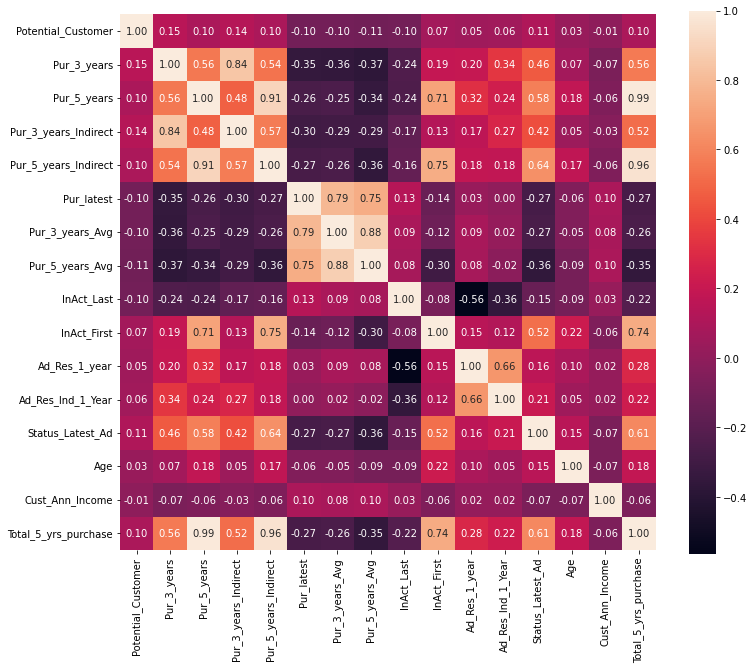

In [156]:
#Your Code Here
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot= True, fmt='0.2f', square = True);

In [ ]:
#Your Code Here

### Summarize your findings - what have you learned from your insights?

In [ ]:
#Star Customers purchase most frequently than others
#First Buyer Customer only purchase once because it's their first purchase.
#Most of the customers have earned around $50,000 yearly.
#Star Buyers has the highest average number of purchase made in the last 5 years.
#Most of the customers owns property.
#Majority of our customers are female.

### Find the Numerical Summary statistics for the variables such as mean, median, mode

In [158]:
# Take some time to understand these numbers
data.describe(include = 'all')

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_5_yrs_purchase
count,3618.000000,3618,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618,...,3618.000000,3618.000000,3618.000000,3618,3618.000000,3618.000000,3618,3618,3618.000000,3618.000000
unique,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264,...,NaN,NaN,NaN,6,NaN,NaN,2,2,NaN,NaN
top,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,A,NaN,NaN,F,H,NaN,NaN
freq,NaN,1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662,...,NaN,NaN,NaN,2146,NaN,NaN,2088,1981,NaN,NaN
mean,0.479823,NaN,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,NaN,...,73.807352,13.031786,5.403814,NaN,0.568546,59.527363,NaN,NaN,50519.650636,16.906302
std,0.499662,NaN,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,NaN,...,38.127214,4.941665,1.356644,NaN,0.495348,14.418886,NaN,NaN,16007.107051,14.000506
min,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,NaN,...,15.000000,3.000000,1.000000,NaN,0.000000,16.000000,NaN,NaN,16564.000000,1.000000
25%,0.000000,NaN,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,NaN,...,40.000000,11.000000,5.000000,NaN,0.000000,51.000000,NaN,NaN,42274.500000,6.000000
50%,0.000000,NaN,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,NaN,...,74.000000,12.000000,6.000000,NaN,1.000000,60.000000,NaN,NaN,44285.750000,13.000000
75%,1.000000,NaN,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,NaN,...,111.000000,13.000000,6.000000,NaN,1.000000,70.000000,NaN,NaN,56508.000000,24.000000


In [161]:
data.dtypes

Potential_Customer            int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_Ind_1_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
Total_5_yrs_purchase          int64
dtype: object

### Check for outliers by either plotting box plots or IQR For all numerical variables

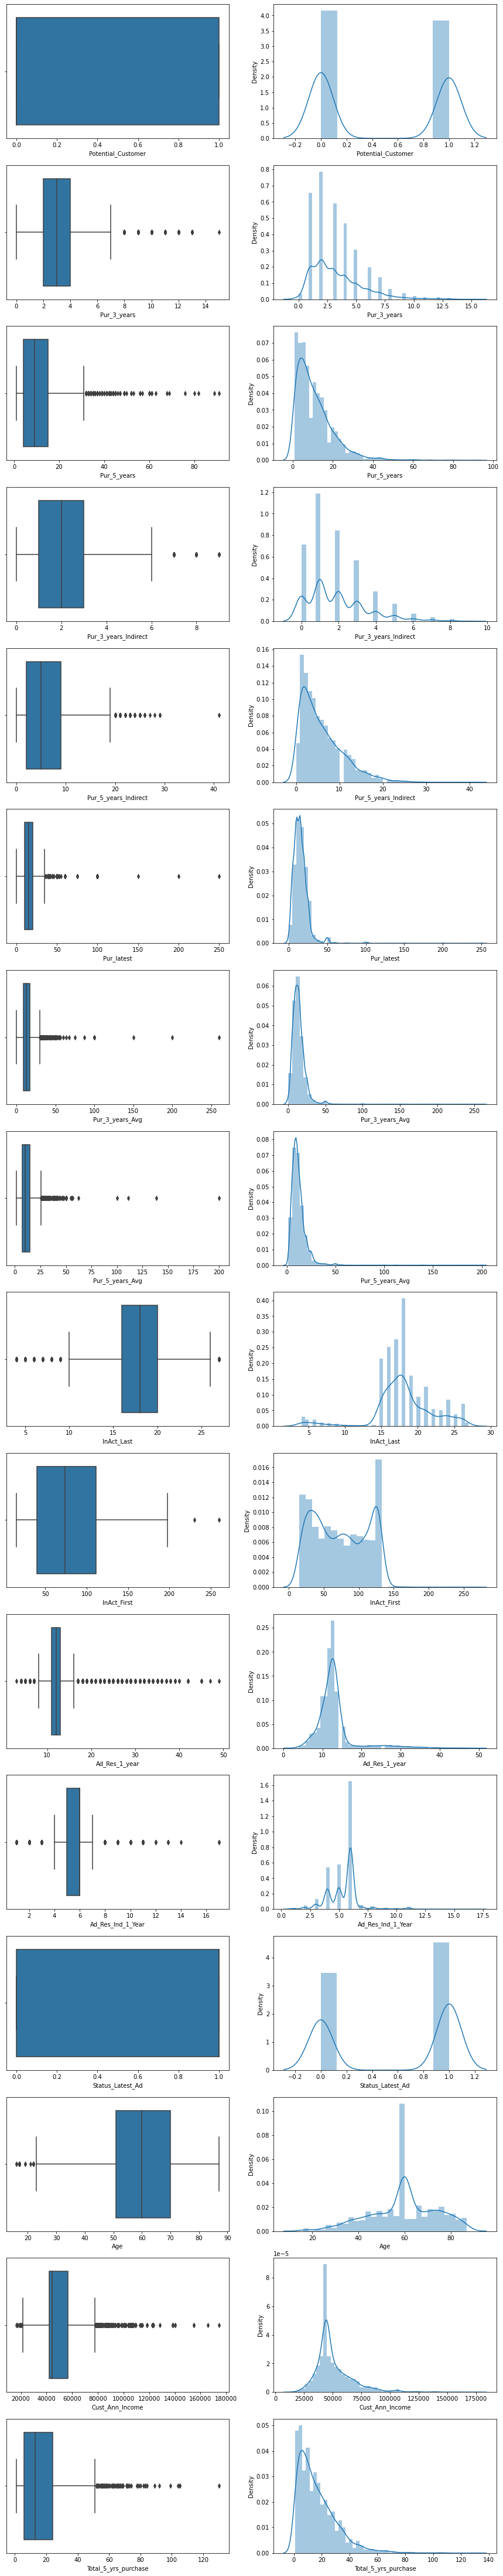

In [167]:
numeric_data = data.columns[data.dtypes != 'object']
fig, ax=plt.subplots(nrows=len(numeric_data), ncols=2, figsize=(15,80))
     
for num_att in range(len(numeric_data)):
    sns.boxplot(data[numeric_data[num_att]], ax=ax[num_att, 0])
    sns.distplot(data[numeric_data[num_att]], ax=ax[num_att, 1])

### Pandas to SQL

#### Load the data into a Sql database, customers
Hint: Create database with name Customers
Use pandas to connect and load the dataframe to DATABASE

In [ ]:
import sqlite3
conn=sqlite3.connect('Customers.db')
Cust=pd.read_csv('CLEANED_DATA_GROUP_1.csv')
Cust.to_sql('Customers',conn)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

In [153]:
#Your Code Here
query = pd.read_sql_query('SELECT * FROM Customers LIMIT 5',conn)
query

,index,Unnamed: 0,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,...,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_5_yrs_purchase
0,0,0,1,200.0,4,25,3,17,250.0,64.25,...,129,10,3,F,1,81,M,U,71429.0,42
1,1,1,1,100.0,1,1,0,0,200.0,200.00,...,20,28,5,F,0,42,M,H,65592.0,1
2,2,2,0,0.0,2,9,1,7,150.0,150.00,...,130,20,7,A,0,73,F,H,58514.0,16
3,3,4,1,100.0,2,12,0,5,100.0,100.00,...,125,27,6,A,1,60,M,U,44284.5,17
4,4,5,0,0.0,1,1,1,1,100.0,100.00,...,16,14,5,F,0,60,M,U,44284.5,2


### Once you have created a database, use either SQL or Python to query the data and solve these questions

### Write a query that returns:

#### a) What percentage of female customers own a house? 

In [154]:
Female = pd.read_sql_query('SELECT Count(*) FROM Customers WHERE Gender="F" and Cust_Prop = "H" ', conn)
All = pd.read_sql_query('SELECT Count(*) FROM Customers WHERE Gender="F"', conn)
display((Female*100/All))

,Count(*)
0,51.005747


#### b) How much is the average salary of these customers?

In [155]:
query = pd.read_sql_query("SELECT (ROUND(avg(Cust_Ann_Income),2)) AS Average_Salary from Customers",conn)
query

,Average_Salary
0,50519.65


### Write a query that returns:

#### a) What percentage of purchases are made through external links (indirect buys)?


In [172]:
#Your Code Here

In_pur = pd.read_sql_query('SELECT Count(*) FROM Customers WHERE Pur_5_years_Indirect != 0 ', conn)
All_p = pd.read_sql_query('SELECT Count(*) FROM Customers', conn)
display((In_pur/All_p)*100)

,Count(*)
0,95.743505


#### b) How many purchases have been made by new buyers through external links?

In [170]:
query4 = pd.read_sql_query('SELECT Count(*) FROM Customers WHERE Status_Cust = "N" and Pur_5_years_Indirect != 0', conn)
query4

,Count(*)
0,189


### Write a query that calculate:

#### The average amount of purchases that have been made by Star Buyers?

In [169]:
query = pd.read_sql_query("SELECT (ROUND(avg(Total_5_yrs_purchase),2)) AS Average_Amount_of_Purchases from Customers WHERE Status_Cust = 'S' ",conn)
query

,Average_Amount_of_Purchases
0,30.06
